## Notebook for preparing and preprocessing train/test data for BERT / XLM_ROBERTA models fine-tuning

Creates <code>train_bert.csv</code> and <code>test_bert.csv</code> preprocessed datasets for BERT family models.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pycountry
import re

from tqdm.notebook import tqdm
tqdm.pandas()

from cdifflib import CSequenceMatcher

from collections import Counter
import nltk

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load train and test datasets

In [2]:
train = pd.read_csv('data/train.csv', index_col='pair_id')
test = pd.read_csv('data/test.csv', index_col='pair_id')

In [3]:
train.shape

(459450, 3)

## Data PreProcessing

#### 1. Strings to lowercase

In [4]:
train.name_1 = train.name_1.str.lower()
train.name_2 = train.name_2.str.lower()

test.name_1 = test.name_1.str.lower()
test.name_2 = test.name_2.str.lower()

In [5]:
train[train.is_duplicate==1].head()

,name_1,name_2,is_duplicate
pair_id,,,
144,jx nippon oil & gas exploration (brasil) ltda,jx nippon oil & gas exploration technical serv...,1
560,pirelli neumaticos s.a.i.c.,"pirelli tyre co., ltd.",1
774,brenntag australia (pty) ltd.,brenntag group,1
1230,"paul bauder gmbh & co kg, bochum plant",paul bauder ag,1
1445,total ceska republika s.r.o.,total france (arnay le duc),1


#### 2. Remove country names from strings (excess information) using pycountry

In [6]:
%%time

countries = [country.name.lower() for country in pycountry.countries]

for country in tqdm(countries):
    train.replace(re.compile(fr'\b({country})\b', flags=re.IGNORECASE), "", inplace=True)
    test.replace(re.compile(fr'\b({country})\b', flags=re.IGNORECASE), "", inplace=True)

  0%|          | 0/249 [00:00<?, ?it/s]

CPU times: user 7min 52s, sys: 1.55 s, total: 7min 53s
Wall time: 7min 54s


In [8]:
train[train.is_duplicate==1].head()

,name_1,name_2,is_duplicate
pair_id,,,
144,jx nippon oil & gas exploration (brasil) ltda,jx nippon oil & gas exploration technical serv...,1
560,pirelli neumaticos s.a.i.c.,"pirelli tyre co., ltd.",1
774,brenntag (pty) ltd.,brenntag group,1
1230,"paul bauder gmbh & co kg, bochum plant",paul bauder ag,1
1445,total ceska republika s.r.o.,total (arnay le duc),1


In [9]:
test.head(15)

,name_1,name_2
pair_id,,
1,sun blinds decoration inc.,indl de cuautitlan sa cv
2,eih ltd.,"dongguan wei shi plastic product co., ltd."
3,jsh ltd. (hk),arab shipbuilding and repair yard c
4,better industrial ltd.,farmacap industria e comercio ltda
5,equipos inoxidables del norte sa de cv,bel inc.
6,afton chemical industria de aditivos ltda,gigi industries (pvt.) ltd.
7,"sumec international technology co., ltd.",advanced polymer technology
8,"intermax imp. & exp. co., ltd.","ningbo jiahui huamao imp. & exp. co., ltd."
9,precision ice,uci inc.


In [10]:
test.iloc[[4936, 10374, 10733, 11281, 11440, 14834, 18656],:]

,name_1,name_2
pair_id,,
4937,pr industrie,p.r.industrie produits routiers industrie
10375,filature de rougnat,filature lemieux inc.
10734,danosa,rhenocoll-werk
11282,nis ( gpn subcidiary),omv aktiengesellschaft
11441,henkel capital s.a. de c.v.,henkel capital sa de cv
14835,nknh,soprema iberia s.l.
18657,lg chem ltd.,lg chem america inc.


#### 3. Remove countries, location entitites from strings

In [11]:
filter_words = ['brasil', 'ceska republika', 'czech republic', 'polska', 'venezuela',
               'shanghai', 'shenzhen', 'qingdao', 'dongguan', 'guangzhou', 'usa', 'europa'
               'america', 'rumunia', 'италия', 'toronto', 'mexicana','nederland', 'texas', 
               'vietnam', 'houston', 'europe', 'asia', 'africa', 'americas', 'new york',
               'korea', 'deutschland', 'pacific', 'north', 'south', 'west', 'east']

In [12]:
for word in tqdm(filter_words):
    train.replace(re.compile(fr'\b({word})\b'), "", inplace=True)
    test.replace(re.compile(fr'\b({word})\b'), "", inplace=True)

  0%|          | 0/32 [00:00<?, ?it/s]

In [13]:
train[train.is_duplicate==1].head()

,name_1,name_2,is_duplicate
pair_id,,,
144,jx nippon oil & gas exploration () ltda,jx nippon oil & gas exploration technical serv...,1
560,pirelli neumaticos s.a.i.c.,"pirelli tyre co., ltd.",1
774,brenntag (pty) ltd.,brenntag group,1
1230,"paul bauder gmbh & co kg, bochum plant",paul bauder ag,1
1445,total s.r.o.,total (arnay le duc),1


In [14]:
test.head(15)

,name_1,name_2
pair_id,,
1,sun blinds decoration inc.,indl de cuautitlan sa cv
2,eih ltd.,"wei shi plastic product co., ltd."
3,jsh ltd. (hk),arab shipbuilding and repair yard c
4,better industrial ltd.,farmacap industria e comercio ltda
5,equipos inoxidables del norte sa de cv,bel inc.
6,afton chemical industria de aditivos ltda,gigi industries (pvt.) ltd.
7,"sumec international technology co., ltd.",advanced polymer technology
8,"intermax imp. & exp. co., ltd.","ningbo jiahui huamao imp. & exp. co., ltd."
9,precision ice,uci inc.


In [15]:
test.iloc[[4936, 10374, 10733, 11281, 11440, 14834, 18656],:]

,name_1,name_2
pair_id,,
4937,pr industrie,p.r.industrie produits routiers industrie
10375,filature de rougnat,filature lemieux inc.
10734,danosa,rhenocoll-werk
11282,nis ( gpn subcidiary),omv aktiengesellschaft
11441,henkel capital s.a. de c.v.,henkel capital sa de cv
14835,nknh,soprema iberia s.l.
18657,lg chem ltd.,lg chem america inc.


In [16]:
us_states = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

#### 4. Remove punctuation, brackets and its contents

In [17]:
train.replace(re.compile(r"\s+\(.*\)"), "", inplace=True)
test.replace(re.compile(r"\s+\(.*\)"), "", inplace=True)

train.replace(re.compile(r"\s+\[.*\]"), "", inplace=True)
test.replace(re.compile(r"\s+\[.*\]"), "", inplace=True)

train.replace(re.compile(r"[^\w\s]"), "", inplace=True)
test.replace(re.compile(r"[^\w\s]"), "", inplace=True)

In [18]:
train[train.is_duplicate==1]

,name_1,name_2,is_duplicate
pair_id,,,
144,jx nippon oil gas exploration ltda,jx nippon oil gas exploration technical servi...,1
560,pirelli neumaticos saic,pirelli tyre co ltd,1
774,brenntag ltd,brenntag group,1
1230,paul bauder gmbh co kg bochum plant,paul bauder ag,1
1445,total sro,total,1
...,...,...,...
458469,arlanxeo international group,arlanxeo corp,1
458706,brenntag sac,brenntag comercial e industrial ltda,1
458769,dow chemical international private ltd,dow chemical,1


In [19]:
test.iloc[[4936, 10374, 10733, 11281, 11440, 14834, 18656],:]

,name_1,name_2
pair_id,,
4937,pr industrie,prindustrie produits routiers industrie
10375,filature de rougnat,filature lemieux inc
10734,danosa,rhenocollwerk
11282,nis,omv aktiengesellschaft
11441,henkel capital sa de cv,henkel capital sa de cv
14835,nknh,soprema iberia sl
18657,lg chem ltd,lg chem america inc


#### 5. Remove legal entities and abbreviations in entity names, such as "Ltd." or "ООО"

https://en.wikipedia.org/wiki/List_of_legal_entity_types_by_country

In [20]:
# def multi_str_replace(strings, debug=True):
#     re_str = r'\b(?:' + '|'.join(
#         [re.escape(s) for s in strings]
#     ) + r')(?!\S)'
#     if debug:
#         print(re_str)
#     return re.compile(re_str, re.UNICODE)

legal_entities = ['ltd', 'unltd', 'ultd', 'lp', 'llp', 'lllp','llc', 
                  'pllc', 'co', 'inc.', 'inc', 'bv', 'corp', 'pc', 'scrl',
                  'rl', 'pvt', 'spa', 'ca', 'sa', 'sl', 'slne', 'sll', 'de',
                  'sc', 'scp', 'sad', 'sociedad', 'sociedade', 'cooperativa', 
                  'sro.', 's a', 'cv', 'ооо', 'зао', 'пао', 'ао', 'нко', 'нпф',
                  '有限公司', '股份有限公司', '无限责任公司', '有限责任股份公司', 'ltda', 'sro'
                  'kgaa', 'gmbh', 'ev', 'rv', 'mbh', 'ag', 'societe', 'sep', 'cv', 'ltda',
                  'snc', 'scs', 'sca', 'sci', 'sa', 'sas', 'sarl', 'societa', 'pvt', 'private',
                  'imp', 'exp', 'sanayi', 'co', 'kg', 'saic', 'co,', 'sac',
                  'saic', 'ev', 'rv', 'bv', 'pc', 'rl', 'spa', 'ca', 'sa', 'sl', 'slne', 'sll',
                  'sc', 'scp', 'sad', 'sociedad', 'sociedade', 'cooperativa', 
                  'sro', 'sa', 'cv']

for entity in tqdm(legal_entities):
    train.replace(re.compile(fr'\b({entity})\b'), '', inplace=True)
    test.replace(re.compile(fr'\b({entity})\b'), '', inplace=True)

  0%|          | 0/93 [00:00<?, ?it/s]

In [21]:
train[train.is_duplicate==1]

,name_1,name_2,is_duplicate
pair_id,,,
144,jx nippon oil gas exploration,jx nippon oil gas exploration technical servi...,1
560,pirelli neumaticos,pirelli tyre,1
774,brenntag,brenntag group,1
1230,paul bauder bochum plant,paul bauder,1
1445,total,total,1
...,...,...,...
458469,arlanxeo international group,arlanxeo,1
458706,brenntag,brenntag comercial e industrial,1
458769,dow chemical international,dow chemical,1


In [22]:
test.head(15)

,name_1,name_2
pair_id,,
1,sun blinds decoration,indl cuautitlan
2,eih,wei shi plastic product
3,jsh,arab shipbuilding and repair yard c
4,better industrial,farmacap industria e comercio
5,equipos inoxidables del norte,bel
6,afton chemical industria aditivos,gigi industries
7,sumec international technology,advanced polymer technology
8,intermax,ningbo jiahui huamao
9,precision ice,uci


In [23]:
test.iloc[[4936, 10374, 10733, 11281, 11440, 14834, 18656],:]

,name_1,name_2
pair_id,,
4937,pr industrie,prindustrie produits routiers industrie
10375,filature rougnat,filature lemieux
10734,danosa,rhenocollwerk
11282,nis,omv aktiengesellschaft
11441,henkel capital,henkel capital
14835,nknh,soprema iberia
18657,lg chem,lg chem america


#### 6. Remove top unigrams and bigrams of length < 4 (prepositions, articles, noise, excess words)

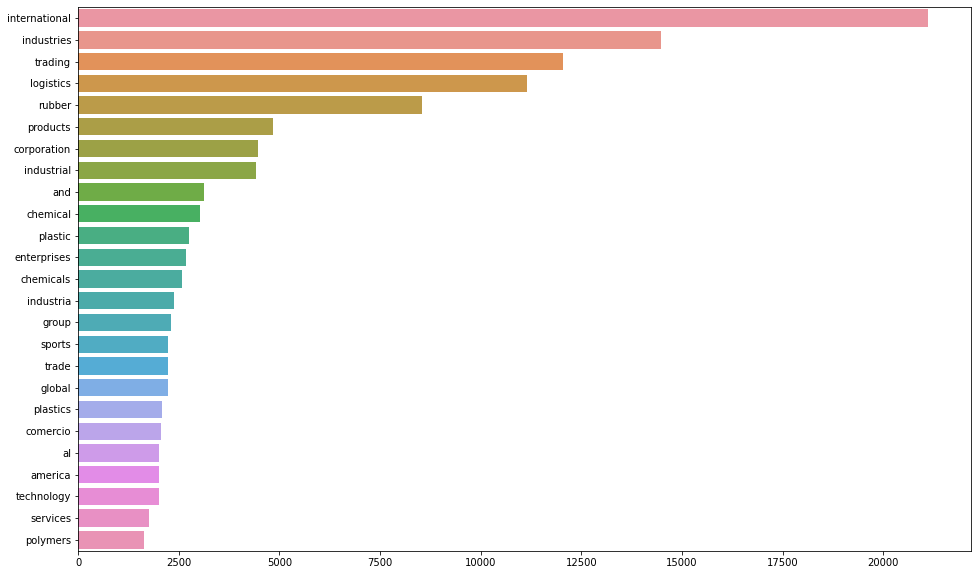

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq

top_n_bigrams = get_top_ngram(test['name_1'], 1)[:25]

x,y=map(list, zip(*top_n_bigrams))

plt.figure(figsize=(16,10))
sns.barplot(x=y, y=x)
plt.show()

In [25]:
uni_bigrams = list(set().union(get_top_ngram(train['name_2'], 1), get_top_ngram(train['name_1'], 1))) 

uni_bigrams_1s = [word[0] for word in uni_bigrams if len(word[0]) < 2]
uni_bigrams_1s

[]

In [26]:
filter_ngrams = ['corporation', 'limited', 'corp', 'comercio',
                 'holding', 'logistica', 'limited',
                 'and', 'srl', 'mfg', 'international',
                 'imp', 'exp', 'a', 'e', 'de de', 'nad de', 've ticaret', 'comenrcio', 'szhizhenny',
                 'de rl', 'rl de', 'sdn bhd', 'sp oo', 'the', 'de', 'al', 'of', 
                 'for', 'us', 'american', 'america']

In [27]:
%%time

for word in tqdm(filter_ngrams):
    train.replace(re.compile(fr'\b({word})\b'), '', inplace=True)
    test.replace(re.compile(fr'\b({word})\b'), '', inplace=True)

  0%|          | 0/32 [00:00<?, ?it/s]

CPU times: user 1min 11s, sys: 116 ms, total: 1min 11s
Wall time: 1min 12s


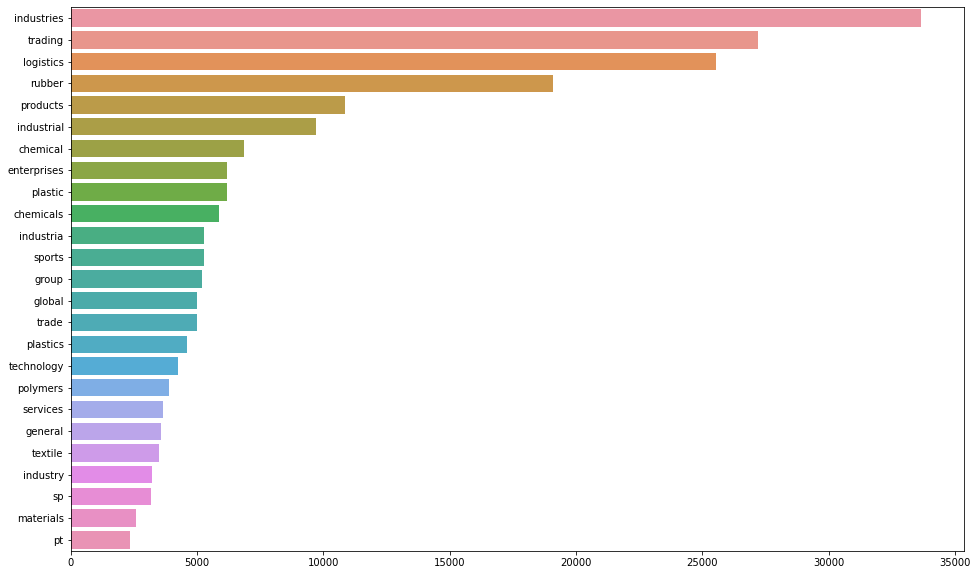

In [28]:
top_n_bigrams = get_top_ngram(train['name_1'], 1)[:25]

x,y=map(list, zip(*top_n_bigrams))

plt.figure(figsize=(16,10))
sns.barplot(x=y, y=x)
plt.show()

In [29]:
train[train.is_duplicate==1]

,name_1,name_2,is_duplicate
pair_id,,,
144,jx nippon oil gas exploration,jx nippon oil gas exploration technical servi...,1
560,pirelli neumaticos,pirelli tyre,1
774,brenntag,brenntag group,1
1230,paul bauder bochum plant,paul bauder,1
1445,total,total,1
...,...,...,...
458469,arlanxeo group,arlanxeo,1
458706,brenntag,brenntag comercial industrial,1
458769,dow chemical,dow chemical,1


In [30]:
test.head()

,name_1,name_2
pair_id,,
1,sun blinds decoration,indl cuautitlan
2,eih,wei shi plastic product
3,jsh,arab shipbuilding repair yard c
4,better industrial,farmacap industria
5,equipos inoxidables del norte,bel


In [31]:
test.iloc[[4936, 10374, 10733, 11281, 11440, 14834, 18656],:]

,name_1,name_2
pair_id,,
4937,pr industrie,prindustrie produits routiers industrie
10375,filature rougnat,filature lemieux
10734,danosa,rhenocollwerk
11282,nis,omv aktiengesellschaft
11441,henkel capital,henkel capital
14835,nknh,soprema iberia
18657,lg chem,lg chem


#### 6. Remove all digits/numbers

In [32]:
train.replace(re.compile(r'\b\d+\b'), "", inplace=True)
test.replace(re.compile(r'\b\d+\b'), "", inplace=True)

In [33]:
train[train.is_duplicate==1]

,name_1,name_2,is_duplicate
pair_id,,,
144,jx nippon oil gas exploration,jx nippon oil gas exploration technical servi...,1
560,pirelli neumaticos,pirelli tyre,1
774,brenntag,brenntag group,1
1230,paul bauder bochum plant,paul bauder,1
1445,total,total,1
...,...,...,...
458469,arlanxeo group,arlanxeo,1
458706,brenntag,brenntag comercial industrial,1
458769,dow chemical,dow chemical,1


In [34]:
test.head(10)

,name_1,name_2
pair_id,,
1,sun blinds decoration,indl cuautitlan
2,eih,wei shi plastic product
3,jsh,arab shipbuilding repair yard c
4,better industrial,farmacap industria
5,equipos inoxidables del norte,bel
6,afton chemical industria aditivos,gigi industries
7,sumec technology,advanced polymer technology
8,intermax,ningbo jiahui huamao
9,precision ice,uci


In [35]:
train.name_1 = train.name_1.str.strip()
train.name_2 = train.name_2.str.strip()

test.name_1 = test.name_1.str.strip()
test.name_2 = test.name_2.str.strip()

## Data Augmentation

In [37]:
# import random

# indices = random.sample(set(duplicates.index), 1700)
# sample = pd.DataFrame(train.iloc[indices, :])
# sample = sample.values.tolist()
# sample

In [38]:
# def swap_word(new_words):
    
#     random_idx_1 = random.randint(0, len(new_words)-1)
#     random_idx_2 = random_idx_1
#     counter = 0
    
#     while random_idx_2 == random_idx_1:
#         random_idx_2 = random.randint(0, len(new_words)-1)
#         counter += 1
        
#         if counter > 3:
#             return new_words
    
#     new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
#     return new_words

# def random_swap(words, n):
    
#     words = words.split()
#     new_words = words.copy()
    
#     for _ in range(n):
#         new_words = swap_word(new_words)
        
#     sentence = ' '.join(new_words)
    
#     return sentence


# random_swap('Brenntag Peru S.A.C.', n=random.randint(2, 3))


In [39]:
def gen_sample(train):

    duplicates = train[train.is_duplicate == 1]
    indices = random.sample(set(duplicates.index), 2500)
    sample = pd.DataFrame(train.iloc[indices, :])
    
    return sample

# sample_1 = gen_sample(train)
# cond_1 = sample_1['name_1'].str.split().str.len() > 2
# cond_2 = sample_1['name_2'].str.split().str.len() > 2
# swap_sample = sample_1[cond_1 | cond_2]

In [40]:
sample_2 = gen_sample(train)
cond_1 = sample_2['name_1'].str.split().str.len() > 4
cond_2 = sample_2['name_2'].str.split().str.len() > 4
del_sample = sample_2[cond_1 | cond_2]

In [41]:
# print('Sample 1:', len(swap_sample))
print('Sample 2:', len(del_sample))

Sample 2: 159


In [42]:
del_sample

,name_1,name_2,is_duplicate
pair_id,,,
177842,basf,basf turk kimya san ve ticsti,1
411913,jx nippon oil gas exploration,jx nippon oil gas exploration,1
152144,basf turk kimya san ve tictldsti,basf turk kimya san ve ticsti,1
80269,michelin hungaria kft,michelin simorep et ciesimorep cie,1
95946,inreco emulsje,inreco emulsja sp z oo,1
...,...,...,...
71346,lotos asfalt,lotos asfalt sp z oo,1
323547,soprema sp z o o,soprema nv,1
391455,ford ieo,общество с ограниченной ответственностью форд ...,1


In [43]:
del_samples = []

for i, j in del_sample.iterrows():
    
    if len(j.name_1.split()) > len(j.name_2.split()):
        del_str = j.name_1
        add_str = j.name_2
    else:
        del_str = j.name_2
        add_str = j.name_1
    
    if len(j.name_1.split()) > 5:
        n = random.randint(3, 4)
    else:
        n = random.randint(1, 2)
        
    del_str = del_str.rsplit(' ', n)[0]

    del_samples.append([del_str, add_str, 1])

In [44]:
del_samples = pd.DataFrame(del_samples)
del_samples.columns = ['name_1', 'name_2', 'is_duplicate']
del_samples

,name_1,name_2,is_duplicate
0,basf turk kimya san ve,basf,1
1,jx nippon oil gas,jx nippon oil gas exploration,1
2,basf turk,basf turk kimya san ve tictldsti,1
3,michelin simorep et ciesimorep,michelin hungaria kft,1
4,inreco emulsja sp,inreco emulsje,1
...,...,...,...
154,lotos asfalt sp z,lotos asfalt,1
155,soprema sp z,soprema nv,1
156,общество с ограниченной ответственностью форд ...,ford ieo,1
157,mitsubishi gas chemical,mitsubishi chemical performance,1


In [45]:
train_augmented = train.append(del_samples, ignore_index=True)
train_augmented

,name_1,name_2,is_duplicate
0,iko industries,enormous industrial trade,0
1,apcotex industries,technocraft industries,0
2,tress as,longyou industries park zhejiang,0
3,wpt,hopkins s,0
4,national bank,action,0
...,...,...,...
459604,lotos asfalt sp z,lotos asfalt,1
459605,soprema sp z,soprema nv,1
459606,общество с ограниченной ответственностью форд ...,ford ieo,1
459607,mitsubishi gas chemical,mitsubishi chemical performance,1


Shuffle randomly dataframe of train dataset

In [46]:
train_augmented = train_augmented.sample(frac=1).reset_index(drop=True)
train_augmented

,name_1,name_2,is_duplicate
0,bollore logistics,repremar logistics,0
1,boc,manufacturas y procesos,0
2,,succeed rubber plastic,0
3,ideal trading,steps trading,0
4,longkou dawn engineering plastic,solico engineering,0
...,...,...,...
459604,cepsa,imper,0
459605,eternal,ami andina materiales industriales,0
459606,national industries,pt elegant textile industries,0
459607,foshan yawei trade,lakshmi,0


In [48]:
train = train_augmented

train.insert(0, 'pair_id', train.index)
train

,pair_id,name_1,name_2,is_duplicate
0,0,bollore logistics,repremar logistics,0
1,1,boc,manufacturas y procesos,0
2,2,,succeed rubber plastic,0
3,3,ideal trading,steps trading,0
4,4,longkou dawn engineering plastic,solico engineering,0
...,...,...,...,...
459604,459604,cepsa,imper,0
459605,459605,eternal,ami andina materiales industriales,0
459606,459606,national industries,pt elegant textile industries,0
459607,459607,foshan yawei trade,lakshmi,0


In [49]:
print(train.shape)
print(test.shape)

(459609, 4)
(213249, 2)


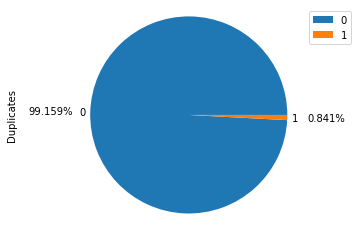

In [50]:
train.is_duplicate.value_counts().plot(kind='pie', label='Duplicates',
                                       autopct='%.3f%%', pctdistance=1.4, labeldistance=1.05)
plt.legend()
plt.axis('equal')
plt.show()

In [51]:
train.to_csv('train_bert.csv', index=None)
test.to_csv('test_bert.csv', index=None)

In [52]:
train = pd.read_csv('train_bert.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459609 entries, 0 to 459608
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   pair_id       459609 non-null  int64 
 1   name_1        458211 non-null  object
 2   name_2        458074 non-null  object
 3   is_duplicate  459609 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 14.0+ MB


In [53]:
test = pd.read_csv('test_bert.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213249 entries, 0 to 213248
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name_1  212010 non-null  object
 1   name_2  211997 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [54]:
train_drop = train.dropna(how='any')
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456676 entries, 0 to 459608
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   pair_id       456676 non-null  int64 
 1   name_1        456676 non-null  object
 2   name_2        456676 non-null  object
 3   is_duplicate  456676 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 17.4+ MB


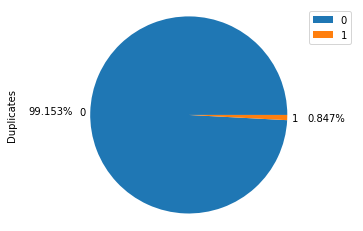

In [55]:
train_drop.is_duplicate.value_counts().plot(kind='pie', label='Duplicates',
                                       autopct='%.3f%%', pctdistance=1.4, labeldistance=1.05)
plt.legend()
plt.axis('equal')
plt.show()

In [56]:
train_drop.to_csv('train_bert.csv', index=None)

In [57]:
train = pd.read_csv('train_bert.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456676 entries, 0 to 456675
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   pair_id       456676 non-null  int64 
 1   name_1        456676 non-null  object
 2   name_2        456676 non-null  object
 3   is_duplicate  456676 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.9+ MB


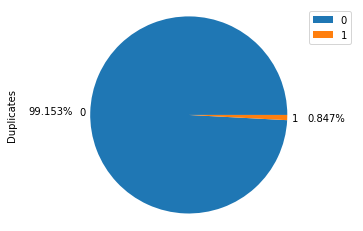

In [58]:
train_drop.is_duplicate.value_counts().plot(kind='pie', label='Duplicates',
                                       autopct='%.3f%%', pctdistance=1.4, labeldistance=1.05)
plt.legend()
plt.axis('equal')
plt.show()

In [59]:
train_drop.is_duplicate.value_counts()

0    452810
1      3866
Name: is_duplicate, dtype: int64